## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

### Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [52]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from icecream import ic

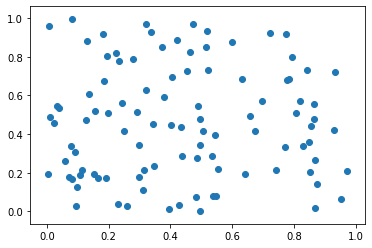

In [53]:
# %matplotlib inline
random_data = np.random.random((100, 2))
X = random_data[:, 0]
Y = random_data[:,1]

plt.scatter(X, Y)


In [54]:
random_data
X

array([0.31573223, 0.00410825, 0.55437999, 0.84186422, 0.77790322,
       0.19021373, 0.40424763, 0.48371694, 0.77346337, 0.15429256,
       0.43659977, 0.53871638, 0.85427712, 0.29193464, 0.33842815,
       0.8644174 , 0.24997996, 0.26005657, 0.3212103 , 0.77136313,
       0.08173956, 0.51537112, 0.23398755, 0.39637264, 0.02288596,
       0.45468367, 0.12552755, 0.49703001, 0.19711692, 0.86787222,
       0.0800625 , 0.40133219, 0.29848802, 0.37364074, 0.48541385,
       0.86368215, 0.15468894, 0.09860573, 0.13139082, 0.53479105,
       0.72301074, 0.4955368 , 0.81911599, 0.97061137, 0.07317147,
       0.13634921, 0.850582  , 0.65809112, 0.37886255, 0.50566483,
       0.86771236, 0.43378843, 0.1059401 , 0.34667023, 0.63214048,
       0.18239131, 0.22985089, 0.80623978, 0.74093624, 0.07894499,
       0.54281535, 0.87374025, 0.19366415, 0.84745453, 0.32025897,
       0.78345065, 0.67471574, 0.18651578, 0.05855921, 0.95064519,
       0.79308749, 0.49564063, 0.03997967, 0.48777768, 0.22472

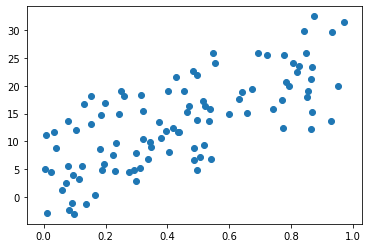

In [55]:
y = [20 * x + 5 + random.randint(-10, 10) for x in X]

plt.scatter(X, y)

线性回归
$$ y = k * x + b $$

In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [57]:
print('回归线的k值是: {0}'.format(reg.coef_))
print('回归线的截距b是: {0}'.format(reg.intercept_))
print('回归线的R^2是: {0}'.format(reg.score(X.reshape(-1, 1), y)))

回归线的k值是: [20.92273627]
回归线的截距b是: 4.296401044507183
回归线的R^2是: 0.5212893856673254


In [58]:
### function of predicting new data
def regression_value(x):
    return reg.coef_ * x + reg.intercept_

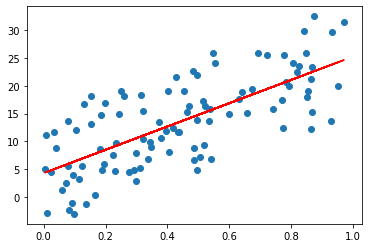

In [59]:
plt.scatter(X, y)
plt.plot(X, regression_value(X), color = 'red')

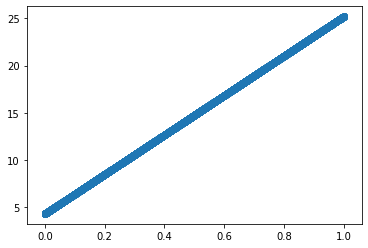

In [60]:
def generate_random_X(n): # n means the number of randomed data
    return [np.random.random((50, 2)) for i in range(n)]

new_dataset_X = generate_random_X(100)

## plot
plt.scatter(new_dataset_X, regression_value(new_dataset_X))

### Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [61]:
from scipy.spatial.distance import cosine

def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [62]:
def distance(x1, x2):
    return cosine(x1, x2)

In [63]:
from collections import Counter
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    return np.mean([i[1] for i in most_similars]) # get the mean of the most similar sets' values

In [64]:
predict(0.892533725055378)

12.633255756138771

### Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [65]:
from collections import defaultdict

def entropy(inlist):
    Entropy = 0
    for i in set(inlist):
        single_frequency = inlist.count(i) / len(inlist)
        Entropy += single_frequency * np.log(single_frequency)
        
    return -1 * Entropy
    

In [66]:
def createDataSet():
	dataSet = [[-10, 2, 0, 'F', 0],						#数据集
			[-10, 2, 1, 'F', 0],
			[-10, 2, 1, 'M', 1],
			[-10, 1, 0, 'M', 1],
			[-10, 2, 0, 'F', 0],
			[10, 2, 0, 'F', 0],
			[10, 2, 1, 'F', 0],
			[10, 1, 1, 'M', 1],
			[10, 1, 2, 'F', 1],
			[10, 1, 2, 'F', 1],
			[20, 1, 2, 'F', 1],
			[20, 1, 1, 'F', 1],
			[20, 2, 1, 'M', 1],
			[20, 2, 2, 'M', 1],
			[20, 2, 0, 'F', 0]]
	labels = ['income', 'family_number', 'loan', 'gender', 'bought']		#特征标签
	return dataSet 							#返回数据集和分类属性

mock_data = createDataSet()

In [67]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset.columns = ['income', 'family_number', 'loan', 'gender', 'bought']
dataset

,income,family_number,loan,gender,bought
0,-10,2,0,F,0
1,-10,2,1,F,0
2,-10,2,1,M,1
3,-10,1,0,M,1
4,-10,2,0,F,0
5,10,2,0,F,0
6,10,2,1,F,0
7,10,1,1,M,1
8,10,1,2,F,1
9,10,1,2,F,1


In [68]:
family_number_set1 = dataset[dataset['family_number']==1]
family_number_set2 = dataset[dataset['family_number']!=1]

In [69]:
entropy(family_number_set1['bought'].tolist()) + entropy(family_number_set2['bought'].tolist())

0.6365141682948128

In [70]:
gender_set1 = dataset[dataset['gender']=='F']
gender_set2 = dataset[dataset['gender']!='F']
entropy(gender_set1['bought'].tolist()) + entropy(gender_set2['bought'].tolist())

0.6730116670092565

In [71]:
def best_feature_selection(training_data, target):
    x_fields = set(training_data.columns.tolist()) - {target}
    # Warning! the set is unordered, so using set to remove 'bought' would change the order of colnames
    spliter = None
    min_entropy = float('inf') # set initialized minimal entropy as Inf, then adjust it in the following steps.
    
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
#         ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_spliter_1)

            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)

            entropy_sum = entropy_1 + entropy_2
#             ic(entropy_sum)
            
            if entropy_sum <= min_entropy:
                min_entropy = entropy_sum
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    print(x_fields)
    return list(x_fields).index(spliter[0]) #+ (min_entropy)
 
best_feature_selection(dataset, target = 'bought')

spliter is: ('family_number', 2)
the min entropy is: 0.6365141682948128
{'family_number', 'income', 'loan', 'gender'}


0

In [72]:
from collections import Counter
def get_most_label(classList):
    classDict = Counter(classList).most_common()
    return list(classDict)[0][0] # retrieve the most frequent element
# get_most_label([1, 1, 1, 2, 2, 3])

In [73]:
def split_data(dataframe, feature, _value):
    dataframe2 = dataframe[dataframe[feature]==_value]
    dataframe3 = dataframe2.drop(feature, 1)
    
    return dataframe3

In [74]:
from collections import Counter
def get_most_choice_in_training_set(training_data, target):
    return list(Counter(training_data[target].values.tolist()).most_common())[0][0]

In [75]:
def createDataSet2():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 							#返回数据集和分类属性

In [77]:
def continous_best_feature_selection(training_data, target, labels, featLabels):
    feature_chosen_list = []
    feature_entropy_dict = {}
    
    ClassList = training_data.loc[:, 'bought'].values.tolist()

    if len(ClassList) == 0:
        return get_most_choice_in_training_set(dataset, target)
    elif len(ClassList) == ClassList.count(ClassList[0]):
        return ClassList[0]
    elif len(labels) == 0 or training_data.shape[1] == 1:
        return get_most_label(ClassList)
    
    best_feature_index = best_feature_selection(training_data, target)
    best_feature = labels[best_feature_index]
    
    featLabels.append(best_feature)
    myTree = {best_feature:{}}
    del labels[best_feature_index]
#     print(best_feature_index)
#     print(training_data)
    unique_feature_values = set([i[best_feature_index] for i in training_data.values.tolist()])
    for value in unique_feature_values:
            subLabels = labels[:]
            myTree[best_feature][value] = continous_best_feature_selection(split_data(training_data, best_feature, value), target, subLabels, featLabels)
    return myTree

Labels = list(set(dataset.columns.tolist()) - {'bought'}) #[i for i in dataset.columns.tolist() if i != 'bought'] #
dataset2 = dataset.loc[:, Labels + ['bought']]
Tree_model = continous_best_feature_selection(dataset2, 'bought', Labels, [])

spliter is: ('family_number', 2)
the min entropy is: 0.6365141682948128
{'family_number', 'income', 'loan', 'gender'}
spliter is: ('gender', 'F')
the min entropy is: -0.0
{'income', 'loan', 'gender'}


### Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [78]:
from sklearn.cluster import KMeans

## Part-2 Question and Answer 问答

In [79]:
X = [random.randint(0, 100) for i in range(100)]
Y = [random.randint(0, 100) for i in range(100)]

### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

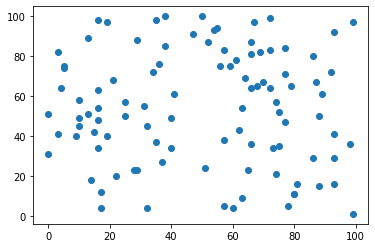

In [80]:
plt.scatter(X, Y)

Ans:

In [81]:
training_data = [[i, j] for i, j in zip(X, Y)]

In [82]:
cluster = KMeans(n_clusters=5, max_iter=1000)

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

In [83]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

In [84]:
cluster.cluster_centers_

array([[78.59090909, 25.        ],
       [14.33333333, 52.75      ],
       [37.13333333, 88.6       ],
       [73.18518519, 74.85185185],
       [31.58333333, 19.25      ]])

In [85]:
cluster.labels_

array([1, 3, 3, 3, 3, 3, 1, 3, 0, 1, 4, 3, 2, 0, 3, 4, 3, 0, 4, 1, 1, 3,
       2, 1, 1, 1, 2, 2, 0, 0, 1, 3, 0, 1, 1, 3, 2, 0, 3, 3, 1, 0, 0, 2,
       2, 4, 1, 0, 0, 4, 4, 0, 1, 0, 2, 0, 3, 3, 4, 2, 3, 1, 3, 1, 1, 2,
       4, 0, 1, 1, 3, 3, 2, 3, 2, 4, 3, 3, 3, 0, 2, 3, 1, 1, 4, 0, 1, 4,
       0, 1, 1, 0, 0, 2, 0, 0, 3, 2, 4, 3], dtype=int32)

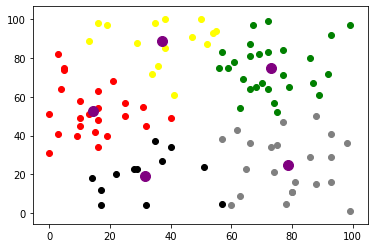

In [86]:
from collections import defaultdict

cluster_label = defaultdict(list)

for label, location in zip(cluster.labels_, training_data):
    cluster_label[label].append(location)

### plot
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']
for label, center in enumerate(cluster_label):
    for location in cluster_label[center]:
        plt.scatter(*location, c = color[label])

for i in range(len(cluster.cluster_centers_)):
    location = cluster.cluster_centers_[i]
    plt.scatter(*location, c = 'purple', s=100)
    
    

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: $$ Precision = \frac{TP}{TP + FP} $$
     $$ Recall = \frac{TP}{TP+FN} $$
     $$ F1-score = \frac{2*Precision*Recall}{Precision + Recall} $$
     $$ F2-score = \frac{5*Precision*Recall}{4*Precision + Recall} $$

Ans: 
   1. **Precision** means how accurate a machine learning model is, namely the true positive divided by all predicted positive samples number.
     
   2. **Recall** measures the fraction of true positive that are successfully retrieved. Also, it can be understood that the threshold that seperates the true positive and false negative.
     
   3. **AUC**: Area under curve. This term means the performance of a model.
     
   4. **F1-score**: Because the precision competes with recall, and it is often hard to measure which model is better just by precision or recall. To balance them, a F1-score is used to give precision and recall same weight in some conditions, so we can judge which model is better.
     
   5. **F2-score**: Sometimes, the weight of precision and recall is different for we would prefer someone. For example, we prefer recall rather than precision in the epidemic disease detection, while precision is more important than recall in the court trial. Under this circumstance, we add a weight parameter 𝛽 to adjust the importance of precision and recall. When more importance is on precision, the 𝛽 would be less than 1, otherwise, it is greater than 1. It is **F2-Score when the 𝛽 is 2**.

 $$ F-score = (1 + \beta^2) * \frac{Precision*Recall}{\beta^2*Precision + Recall} $$

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

### 4. Based on our course and yourself mind, what's the machine learning?  (8')

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

Ans: **Machine learning** is the scientific study that computers use to perform tasks under algorithms and statistical models without using clear instructions. It can undermine underlying mechanisms of data, which can be then used to predict new results with other new data. Without doubt, it is a part of Artificial Intelligence.

### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

Ans: I think it's correct. Through a universal and correct evaluation system and method, we know what a model needs, and we can know a model's performance including precision, recall, etc, under different conditions. From that, the problem that which model is better can be solved.

Also, we can understand the advantages and disadvantages, which provides basis of choice when solving problems and should be the direction that we try to move forward. 

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

### Decision Tree

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

Defining prediction function

In [87]:
def predict(DT_model, feature_labels, test_var):
    firstStr = next(iter(DT_model))
    secondDict = DT_model[firstStr]
    
    feature_label_index = feature_labels.index(firstStr)
    for _key in secondDict.keys():
        if test_var[feature_label_index] == _key:
            if type(secondDict[_key]).__name__ == 'dict':
                predict_result = predict(secondDict[_key], feature_labels, test_var)
            else:
                predict_result = secondDict[_key]
    return str(predict_result) #'feature list is ' + ' '.join(np.array(test_var, dtype=str).tolist()) + '. The predicted result is: ' + str(predict_result)

feature_labels = ['income', 'loan', 'family_number', 'gender']
print(Tree_model)
predict(Tree_model, feature_labels, [10, 0, 1, 'M'])


{'family_number': {1: 1, 2: {'gender': {'M': 1, 'F': 0}}}}


'1'

Generating many kinds of datasets

In [88]:
income_list = [-10, 10, 20]
loan_list = [0, 1, 2]
family_number_list = [1, 2]
gender_list = ['M', 'F']

generated_testset_list = [[i, j, k, m] for i in income_list for j in loan_list for k in family_number_list for m in gender_list]

for _item in generated_testset_list:
    print(' '.join(np.array(_item, dtype=str).tolist()) + '. Predicted result:' + predict(Tree_model, feature_labels, _item))


-10 0 1 M. Predicted result:1
-10 0 1 F. Predicted result:1
-10 0 2 M. Predicted result:1
-10 0 2 F. Predicted result:0
-10 1 1 M. Predicted result:1
-10 1 1 F. Predicted result:1
-10 1 2 M. Predicted result:1
-10 1 2 F. Predicted result:0
-10 2 1 M. Predicted result:1
-10 2 1 F. Predicted result:1
-10 2 2 M. Predicted result:1
-10 2 2 F. Predicted result:0
10 0 1 M. Predicted result:1
10 0 1 F. Predicted result:1
10 0 2 M. Predicted result:1
10 0 2 F. Predicted result:0
10 1 1 M. Predicted result:1
10 1 1 F. Predicted result:1
10 1 2 M. Predicted result:1
10 1 2 F. Predicted result:0
10 2 1 M. Predicted result:1
10 2 1 F. Predicted result:1
10 2 2 M. Predicted result:1
10 2 2 F. Predicted result:0
20 0 1 M. Predicted result:1
20 0 1 F. Predicted result:1
20 0 2 M. Predicted result:1
20 0 2 F. Predicted result:0
20 1 1 M. Predicted result:1
20 1 1 F. Predicted result:1
20 1 2 M. Predicted result:1
20 1 2 F. Predicted result:0
20 2 1 M. Predicted result:1
20 2 1 F. Predicted result:1
20

### Linear regression

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

#### Loss fucntion (L1 norm)
$$ loss = \frac{1}{n} \sum{\lvert{(y_i - \hat{y_i})}\rvert} $$
$$ loss = \frac{1}{n} \sum{\lvert{(y_i - (k*x_i + b_i))}\rvert} $$

In [89]:
def loss(y, y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

#### Define partial derivative
$$ if ({y_i - \hat{y_i}}\neq{0}) $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|})x_i $$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|}) $$



$$ if (y_i - \hat{y_i} = 0), suppose: $$
$$ \frac{\partial{loss}}{\partial{k}} = 0 $$
$$ \frac{\partial{loss}}{\partial{b}} = 0 $$

In [90]:
def partial_derivative_for_k(x, y, y_hat):
    partial_derivative_k = 0
    
    for i in range(len(list(y))):
        if list(y)[i] - list(y_hat)[i] != 0:
            partial_derivative_k += (list(y)[i] - list(y_hat)[i]) * list(x)[i]
        else:
            partial_derivative_k += 0 # when it's not derivatived in 0, so remain the accumulatid partial derivative value
        
    return -2 * partial_derivative_k / len(y)

def partial_derivative_for_b(y, y_hat):
    partial_derivative_b = 0
    
    for i in range(len(list(y))):
        if list(y)[i] - list(y_hat)[i] != 0:
            partial_derivative_b += (list(y)[i] - list(y_hat)[i])
        else:
            partial_derivative_b += 0#  when it's not derivatived in 0, so remain the accumulatid partial derivative value
        
    return -2 * partial_derivative_b / len(y)

In [91]:
def linear_function(k, b, x):
    return k * x + b

In [92]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [93]:
dataset = load_boston()
x, y = dataset['data'], dataset['target']

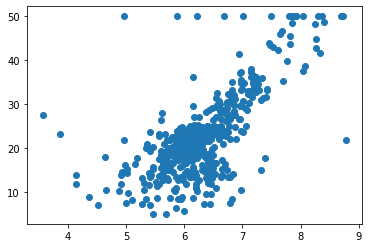

In [94]:
plt.scatter(x[:, 5], y)

#### Startting iteration

In [95]:
import random

k = random.random() * 100 - 100
b = random.random() * 100 - 100

learning_rate = 1e-2
iteration_time = 1000
losses = []

X = x[:, 5]
for i in range(iteration_time):
    fitting_value = [linear_function(k, b, x) for x in X]
    
    loss_now = loss(list(y), fitting_value)
    losses.append(loss_now)
    
    print('This is the {0} time\'s iteration. The loss is {1}. The k is {2}, and b is {3}'.format(i + 1, loss_now, k, b))
    
    k = k - partial_derivative_for_k(X, y, fitting_value) * learning_rate
    b = b - partial_derivative_for_b(y, fitting_value) * learning_rate
    
best_k = k
best_b = b

<class 'list'>
<class 'list'>
This is the 1 time's iteration. The loss is 113.53989393774278. The k is -4.660787430282824, and b is -61.71574265713973
This is the 2 time's iteration. The loss is 20.744620774003888. The k is 9.745965269705758, and b is -59.44494477838487
This is the 3 time's iteration. The loss is 6.110251870385677. The k is 12.344969078289646, and b is -59.03038632577354
This is the 4 time's iteration. The loss is 4.86787592761431. The k is 12.813217782036253, and b is -58.950794816380125
This is the 5 time's iteration. The loss is 4.7793230201504295. The k is 12.896963426903415, and b is -58.93165057528255
This is the 6 time's iteration. The loss is 4.769056466283701. The k is 12.911324145125548, and b is -58.923415434197395
This is the 7 time's iteration. The loss is 4.767148085209197. The k is 12.91316425788157, and b is -58.91715003320526
This is the 8 time's iteration. The loss is 4.766654885664615. The k is 12.9127451582211, and b is -58.91124122895103
This is th

This is the 69 time's iteration. The loss is 4.755590644896568. The k is 12.857356968834576, and b is -58.558196381519856
This is the 70 time's iteration. The loss is 4.755411729161925. The k is 12.856453935850755, and b is -58.55245208214314
This is the 71 time's iteration. The loss is 4.755232856451564. The k is 12.855551120021321, and b is -58.5467091641111
This is the 72 time's iteration. The loss is 4.755054026755117. The k is 12.854648521294052, and b is -58.54096762709156
This is the 73 time's iteration. The loss is 4.75487524006226. The k is 12.853746139616742, and b is -58.535227470752424
This is the 74 time's iteration. The loss is 4.754696496362633. The k is 12.852843974937198, and b is -58.529488694761675
This is the 75 time's iteration. The loss is 4.754517795645916. The k is 12.851942027203236, and b is -58.523751298787374
This is the 76 time's iteration. The loss is 4.754339137901768. The k is 12.851040296362687, and b is -58.51801528249767
This is the 77 time's iteratio

This is the 137 time's iteration. The loss is 4.74352186774458. The k is 12.796442796782719, and b is -58.17071414463606
This is the 138 time's iteration. The loss is 4.743345854216107. The k is 12.795554411967734, and b is -58.16506302398994
This is the 139 time's iteration. The loss is 4.743169883014. The k is 12.794666240784657, and b is -58.15941326228159
This is the 140 time's iteration. The loss is 4.742993954128083. The k is 12.793778283182116, and b is -58.15376485918423
This is the 141 time's iteration. The loss is 4.742818067548186. The k is 12.792890539108749, and b is -58.14811781437115
This is the 142 time's iteration. The loss is 4.742642223264129. The k is 12.792003008513209, and b is -58.14247212751571
This is the 143 time's iteration. The loss is 4.742466421265758. The k is 12.791115691344158, and b is -58.13682779829137
This is the 144 time's iteration. The loss is 4.742290661542877. The k is 12.790228587550278, and b is -58.13118482637166
This is the 145 time's itera

This is the 205 time's iteration. The loss is 4.731648859173085. The k is 12.736516718291913, and b is -57.789517287498704
This is the 206 time's iteration. The loss is 4.731475700773851. The k is 12.735642744036669, and b is -57.78395783412368
This is the 207 time's iteration. The loss is 4.731302584014408. The k is 12.734768979947994, and b is -57.778399717643
This is the 208 time's iteration. The loss is 4.73112950888475. The k is 12.733895425975346, and b is -57.77284293773516
This is the 209 time's iteration. The loss is 4.730956475374853. The k is 12.7330220820682, and b is -57.76728749407877
This is the 210 time's iteration. The loss is 4.730783483474718. The k is 12.73214894817604, and b is -57.76173338635249
This is the 211 time's iteration. The loss is 4.730610533174339. The k is 12.731276024248363, and b is -57.75618061423506
This is the 212 time's iteration. The loss is 4.730437624463706. The k is 12.73040331023468, and b is -57.750629177405315
This is the 213 time's iterat

This is the 274 time's iteration. The loss is 4.719798094021301. The k is 12.676702907968709, and b is -57.4090345814242
This is the 275 time's iteration. The loss is 4.719627785402396. The k is 12.675843317275826, and b is -57.403566623586755
This is the 276 time's iteration. The loss is 4.719457517737975. The k is 12.674983933290664, and b is -57.398099980641504
This is the 277 time's iteration. The loss is 4.719287291018212. The k is 12.674124755963513, and b is -57.39263465227226
This is the 278 time's iteration. The loss is 4.719117105233261. The k is 12.673265785244679, and b is -57.38717063816289
This is the 279 time's iteration. The loss is 4.71894696037326. The k is 12.672407021084478, and b is -57.38170793799737
This is the 280 time's iteration. The loss is 4.718776856428388. The k is 12.671548463433238, and b is -57.37624655145972
This is the 281 time's iteration. The loss is 4.718606793388788. The k is 12.6706901122413, and b is -57.37078647823406
This is the 282 time's ite

This is the 343 time's iteration. The loss is 4.708167202436981. The k is 12.617873492398152, and b is -57.034813726539404
This is the 344 time's iteration. The loss is 4.708001715463925. The k is 12.617028048547995, and b is -57.029435758438
This is the 345 time's iteration. The loss is 4.707836268285908. The k is 12.616182808003636, and b is -57.02405908358876
This is the 346 time's iteration. The loss is 4.707670860893342. The k is 12.615337770716183, and b is -57.01868370168069
This is the 347 time's iteration. The loss is 4.707505493276665. The k is 12.61449293663676, and b is -57.01330961240288
This is the 348 time's iteration. The loss is 4.707340165426326. The k is 12.613648305716499, and b is -57.007936815444474
This is the 349 time's iteration. The loss is 4.70717487733273. The k is 12.612803877906547, and b is -57.00256531049472
This is the 350 time's iteration. The loss is 4.7070096289863494. The k is 12.611959653158063, and b is -56.997195097242916
This is the 351 time's i

This is the 412 time's iteration. The loss is 4.696841461023545. The k is 12.560012270755983, and b is -56.66675166748933
This is the 413 time's iteration. The loss is 4.696678697577166. The k is 12.559180740924768, and b is -56.661462208104396
This is the 414 time's iteration. The loss is 4.696515973270892. The k is 12.558349411053413, and b is -56.656174020687736
This is the 415 time's iteration. The loss is 4.69635328809529. The k is 12.557518281093834, and b is -56.650887104933474
This is the 416 time's iteration. The loss is 4.696190642040971. The k is 12.556687350997958, and b is -56.64560146053581
This is the 417 time's iteration. The loss is 4.696029939636685. The k is 12.555856620717721, and b is -56.64031708718902
This is the 418 time's iteration. The loss is 4.695870135467363. The k is 12.555026090205077, and b is -56.635033984587444
This is the 419 time's iteration. The loss is 4.695710369726503. The k is 12.554195759411986, and b is -56.62975215242551
This is the 420 time'

This is the 480 time's iteration. The loss is 4.686574208466791. The k is 12.503921350366067, and b is -56.30995070361752
This is the 481 time's iteration. The loss is 4.686426358312083. The k is 12.503103308845443, and b is -56.304747044968
This is the 482 time's iteration. The loss is 4.686278543711234. The k is 12.502285464041114, and b is -56.299544637654066
This is the 483 time's iteration. The loss is 4.686130764655692. The k is 12.501467815905777, and b is -56.294343481374796
This is the 484 time's iteration. The loss is 4.685983021136922. The k is 12.500650364392138, and b is -56.28914357582934
This is the 485 time's iteration. The loss is 4.685835313146365. The k is 12.499833109452915, and b is -56.28394492071695
This is the 486 time's iteration. The loss is 4.685687640675486. The k is 12.499016051040837, and b is -56.27874751573692
This is the 487 time's iteration. The loss is 4.685540003715737. The k is 12.498199189108643, and b is -56.27355136058863
This is the 488 time's i

This is the 549 time's iteration. The loss is 4.676634695013502. The k is 12.447935513188831, and b is -55.95381818646241
This is the 550 time's iteration. The loss is 4.676494642290882. The k is 12.4471309347092, and b is -55.94870016780543
This is the 551 time's iteration. The loss is 4.676354623247068. The k is 12.446326549708377, and b is -55.94358337988997
This is the 552 time's iteration. The loss is 4.676214637873946. The k is 12.445522358139836, and b is -55.938467822420094
This is the 553 time's iteration. The loss is 4.676074686163416. The k is 12.444718359957063, and b is -55.9333534950999
This is the 554 time's iteration. The loss is 4.675934768107398. The k is 12.443914555113551, and b is -55.92824039763357
This is the 555 time's iteration. The loss is 4.67579488369779. The k is 12.443110943562811, and b is -55.92312852972537
This is the 556 time's iteration. The loss is 4.67565503292651. The k is 12.442307525258357, and b is -55.91801789107961
This is the 557 time's itera

This is the 618 time's iteration. The loss is 4.667049644955713. The k is 12.392871071322178, and b is -55.60354677361146
This is the 619 time's iteration. The loss is 4.666911897171786. The k is 12.392079734313523, and b is -55.59851298551399
This is the 620 time's iteration. The loss is 4.666774182512378. The k is 12.39128858759947, and b is -55.59348040790294
This is the 621 time's iteration. The loss is 4.666636500969523. The k is 12.390497631134261, and b is -55.58844904048721
This is the 622 time's iteration. The loss is 4.666498852535261. The k is 12.389706864872142, and b is -55.5834188829758
This is the 623 time's iteration. The loss is 4.666361237201628. The k is 12.388916288767376, and b is -55.578389935077745
This is the 624 time's iteration. The loss is 4.666223654960672. The k is 12.388125902774235, and b is -55.573362196502174
This is the 625 time's iteration. The loss is 4.666086105804425. The k is 12.387335706847002, and b is -55.56833566695828
This is the 626 time's i

This is the 686 time's iteration. The loss is 4.657764485583229. The k is 12.339491361433609, and b is -55.26399213968781
This is the 687 time's iteration. The loss is 4.6576312088893. The k is 12.33871286076462, and b is -55.259040005061756
This is the 688 time's iteration. The loss is 4.657497964244717. The k is 12.33793454730345, and b is -55.25408906128673
This is the 689 time's iteration. The loss is 4.657364751641769. The k is 12.337156421005078, and b is -55.24913930807635
This is the 690 time's iteration. The loss is 4.657231571072763. The k is 12.336378481824498, and b is -55.24419074514434
This is the 691 time's iteration. The loss is 4.6570984225299945. The k is 12.335600729716717, and b is -55.239243372204456
This is the 692 time's iteration. The loss is 4.65696530600575. The k is 12.334823164636743, and b is -55.234297188970544
This is the 693 time's iteration. The loss is 4.656832221492337. The k is 12.334045786539605, and b is -55.22935219515651
This is the 694 time's it

This is the 755 time's iteration. The loss is 4.648781810316294. The k is 12.286211655455972, and b is -54.925073642443024
This is the 756 time's iteration. The loss is 4.648653984203263. The k is 12.285445967078482, and b is -54.92020300831517
This is the 757 time's iteration. The loss is 4.648526188828874. The k is 12.28468046282781, and b is -54.91533354543973
This is the 758 time's iteration. The loss is 4.6483984241857215. The k is 12.283915142659676, and b is -54.910465253535044
This is the 759 time's iteration. The loss is 4.648270690266424. The k is 12.283150006529816, and b is -54.90559813231953
This is the 760 time's iteration. The loss is 4.64814298706359. The k is 12.282385054393973, and b is -54.90073218151168
This is the 761 time's iteration. The loss is 4.648015314569832. The k is 12.281620286207902, and b is -54.89586740083003
This is the 762 time's iteration. The loss is 4.647887672777773. The k is 12.280855701927367, and b is -54.8910037899932
This is the 763 time's i

This is the 823 time's iteration. The loss is 4.640178215078107. The k is 12.234562076315195, and b is -54.59652457437824
This is the 824 time's iteration. The loss is 4.640054731530119. The k is 12.233808808228913, and b is -54.591732947188476
This is the 825 time's iteration. The loss is 4.639931277676515. The k is 12.233055721282712, and b is -54.58694247225214
This is the 826 time's iteration. The loss is 4.639807853510127. The k is 12.232302815433034, and b is -54.58215314929216
This is the 827 time's iteration. The loss is 4.639684459023835. The k is 12.231550090636329, and b is -54.57736497803151
This is the 828 time's iteration. The loss is 4.639561094210492. The k is 12.230797546849061, and b is -54.57257795819324
This is the 829 time's iteration. The loss is 4.639437759062967. The k is 12.2300451840277, and b is -54.56779208950047
This is the 830 time's iteration. The loss is 4.639314453574116. The k is 12.22929300212873, and b is -54.56300737167638
This is the 831 time's ite

This is the 892 time's iteration. The loss is 4.6317271406070315. The k is 12.183009259781835, and b is -54.26859102467817
This is the 893 time's iteration. The loss is 4.631605689308057. The k is 12.182268388718038, and b is -54.263878256411395
This is the 894 time's iteration. The loss is 4.631484267214757. The k is 12.18152769581318, and b is -54.25916662143467
This is the 895 time's iteration. The loss is 4.6313628743200965. The k is 12.180787181024424, and b is -54.25445611947548
This is the 896 time's iteration. The loss is 4.631241510617066. The k is 12.180046844308935, and b is -54.24974675026135
This is the 897 time's iteration. The loss is 4.631120176098639. The k is 12.17930668562389, and b is -54.2450385135199
This is the 898 time's iteration. The loss is 4.630998870757796. The k is 12.178566704926482, and b is -54.2403314089788
This is the 899 time's iteration. The loss is 4.630877594587517. The k is 12.177826902173907, and b is -54.23562543636577
This is the 900 time's it

This is the 960 time's iteration. The loss is 4.62368205472609. The k is 12.133033734793255, and b is -53.950690812630114
This is the 961 time's iteration. The loss is 4.623569186053264. The k is 12.132304881457074, and b is -53.94605449054691
This is the 962 time's iteration. The loss is 4.623456344522228. The k is 12.131576203389903, and b is -53.94141928337058
This is the 963 time's iteration. The loss is 4.623343530126445. The k is 12.130847700549598, and b is -53.93678519083301
This is the 964 time's iteration. The loss is 4.623230742859404. The k is 12.130119372894018, and b is -53.93215221266616
This is the 965 time's iteration. The loss is 4.623117982714567. The k is 12.129391220381041, and b is -53.92752034860206
This is the 966 time's iteration. The loss is 4.623005249685419. The k is 12.128663242968546, and b is -53.92288959837279
This is the 967 time's iteration. The loss is 4.622892543765435. The k is 12.127935440614426, and b is -53.91825996171052
This is the 968 time's i

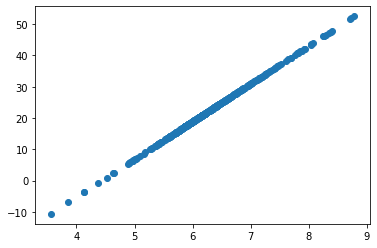

In [96]:
plt.scatter(X, linear_function(best_k, best_b, X))

#### Summary for changing L2-norm to L1-norm
Finally it shows reaching a loss of 4.62. The **convergence rate of loss** is very quick in the first 5 step. Compared to L2 norm results in the last assignment, the convergence rate is related to the **loss function** and the **initial k and b**.